## The task here is to Predict whether a payment by a company to a medical doctor or facility was made as a part of the research project or not.

The data is from the year 2017 which can be found here:
https://www.cms.gov/OpenPayments/Explore-the-Data/Dataset-Downloads.html

In [77]:
# all imports
try:
    import pandas as pd 
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')
    import helpers
    import logging
    from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler,OneHotEncoder
    from category_encoders import TargetEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from imblearn.pipeline import make_pipeline as make_imb_pipeline
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.feature_selection import mutual_info_classif,f_classif
    
except ImportError as error:
    import logging
    logging.info('Error occured while importing libraries')
    logging.error(error)

### <p style="color:red;">Using wrong import to display - try except and logging function toy example</p>

In [62]:
# wrong imports, try except, logging toy example
try:
    from sklearn.impute import SimpleImputer,OneHotEncoder
    from sklearn.preprocessing import StandardScaler
    
except ImportError as error:
    import logging
    logging.info('Error occured while importing libraries')
    logging.error(error)
    
    

INFO:root:Error occured while importing libraries
ERROR:root:cannot import name 'OneHotEncoder' from 'sklearn.impute' (/anaconda3/envs/applied_ml/lib/python3.7/site-packages/sklearn/impute.py)


In [3]:
Research = pd.read_csv("./PGYR17_P011819/OP_DTL_RSRCH_PGYR2017_P01182019.csv",
                       index_col="Record_ID")
General = pd.read_csv('./PGYR17_P011819/OP_DTL_GNRL_PGYR2017_P01182019.csv',
                      index_col="Record_ID")

In [4]:
Research.head(3)

,Change_Type,Covered_Recipient_Type,Noncovered_Recipient_Entity_Name,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,...,Expenditure_Category6,Preclinical_Research_Indicator,Delay_in_Publication_Indicator,Name_of_Study,Dispute_Status_for_Publication,Program_Year,Payment_Publication_Date,ClinicalTrials_Gov_Identifier,Research_Information_Link,Context_of_Research
Record_ID,,,,,,,,,,,,,,,,,,,,,
428263319,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,NaN,142103.0,Cheryl,NaN,Hull,...,NaN,No,No,CFW-2D,No,2017,01/18/2019,NCT02393417,www.nielsenbio.com,Treatment of common warts
428263323,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,NaN,237.0,Steven,NaN,Kempers,...,NaN,No,No,CFW-2D,No,2017,01/18/2019,NCT02393417,www.nielsenbio.com,Treatment of common warts
428263325,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,NaN,342323.0,Leonard,NaN,Swinyer,...,NaN,No,No,CFW-2D,No,2017,01/18/2019,NCT02393417,www.nielsenbio.com,Treatment of common warts


In [5]:
General.head(3)

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
Record_ID,,,,,,,,,,,,,,,,,,,,,
421243947,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,326860.0,NAZEM,NaN,ABRAHAM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,01/18/2019
421243939,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,604392.0,Charles,NaN,Pak,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,01/18/2019
421243941,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,326860.0,Nazem,NaN,Abraham,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,01/18/2019


In [6]:
print('Total rows in Research dataframe:',len(Research))
print('Total rows in General dataframe:',len(General))

Total rows in Research dataframe: 602530
Total rows in General dataframe: 10663833


### Calling helper function to remove columns with more than n% null values (by default n=10%)

#### <p style="color:red;">NOTE: The helper function is written in a separate python file following the PEP 8 guideline which also includes the unit testing [pytest].</p>

In [7]:
# The helper function is written in a separate python file 
# following the PEP 8 guideline which also includes 
# the unit testing [pytest].
research_cleaned = helpers.remove_cols_with_null(Research)
general_cleaned = helpers.remove_cols_with_null(General)

### Assigning a column 'target' to identify whether the data falls under Research [1] or General [0] category

In [11]:
research_cleaned['Target']=np.ones(len(research_cleaned))
general_cleaned['Target']=np.zeros(len(general_cleaned))

In [12]:
common_cols = set(research_cleaned).intersection(set(general_cleaned))
research_cleaned = research_cleaned[common_cols]
general_cleaned = general_cleaned[common_cols]

## Data Exploration

### 1. Data Balance

In [98]:
a = round(len(Research)/(len(Research)+len(General))*100)
print('Research data points are approximately {}% of the total data points'.format(a))

Research data points are approximately 5% of the total data points


#### Observation: The data is highly skewed with class imbalance of 1:19

### 2. Features Analysis

In [14]:
cat_cols = research_cleaned.columns[(research_cleaned.dtypes==object).values]
con_cols = research_cleaned.columns[(research_cleaned.dtypes!=object).values]
print('Total Categorical columns: {}\n {}\n'.format(len(cat_cols),cat_cols))
print('Total Continuous columns: {}\n {} \n'.format(len(con_cols),con_cols))

Total Categorical columns: 16
 Index(['Delay_in_Publication_Indicator', 'Recipient_Zip_Code',
       'Recipient_Country',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Dispute_Status_for_Publication', 'Date_of_Payment',
       'Covered_Recipient_Type', 'Recipient_State', 'Payment_Publication_Date',
       'Change_Type', 'Recipient_City',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Related_Product_Indicator',
       'Recipient_Primary_Business_Street_Address_Line1',
       'Form_of_Payment_or_Transfer_of_Value',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'],
      dtype='object')

Total Continuous columns: 4
 Index(['Total_Amount_of_Payment_USDollars', 'Target', 'Program_Year',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'],
      dtype='object') 



In [15]:
research_cleaned_cat = research_cleaned[cat_cols].astype(str)
general_cleaned_cat = general_cleaned[cat_cols].astype(str)

research_cleaned_con = research_cleaned[con_cols]
general_cleaned_con = general_cleaned[con_cols]

#### a. Categorical Features Analysis

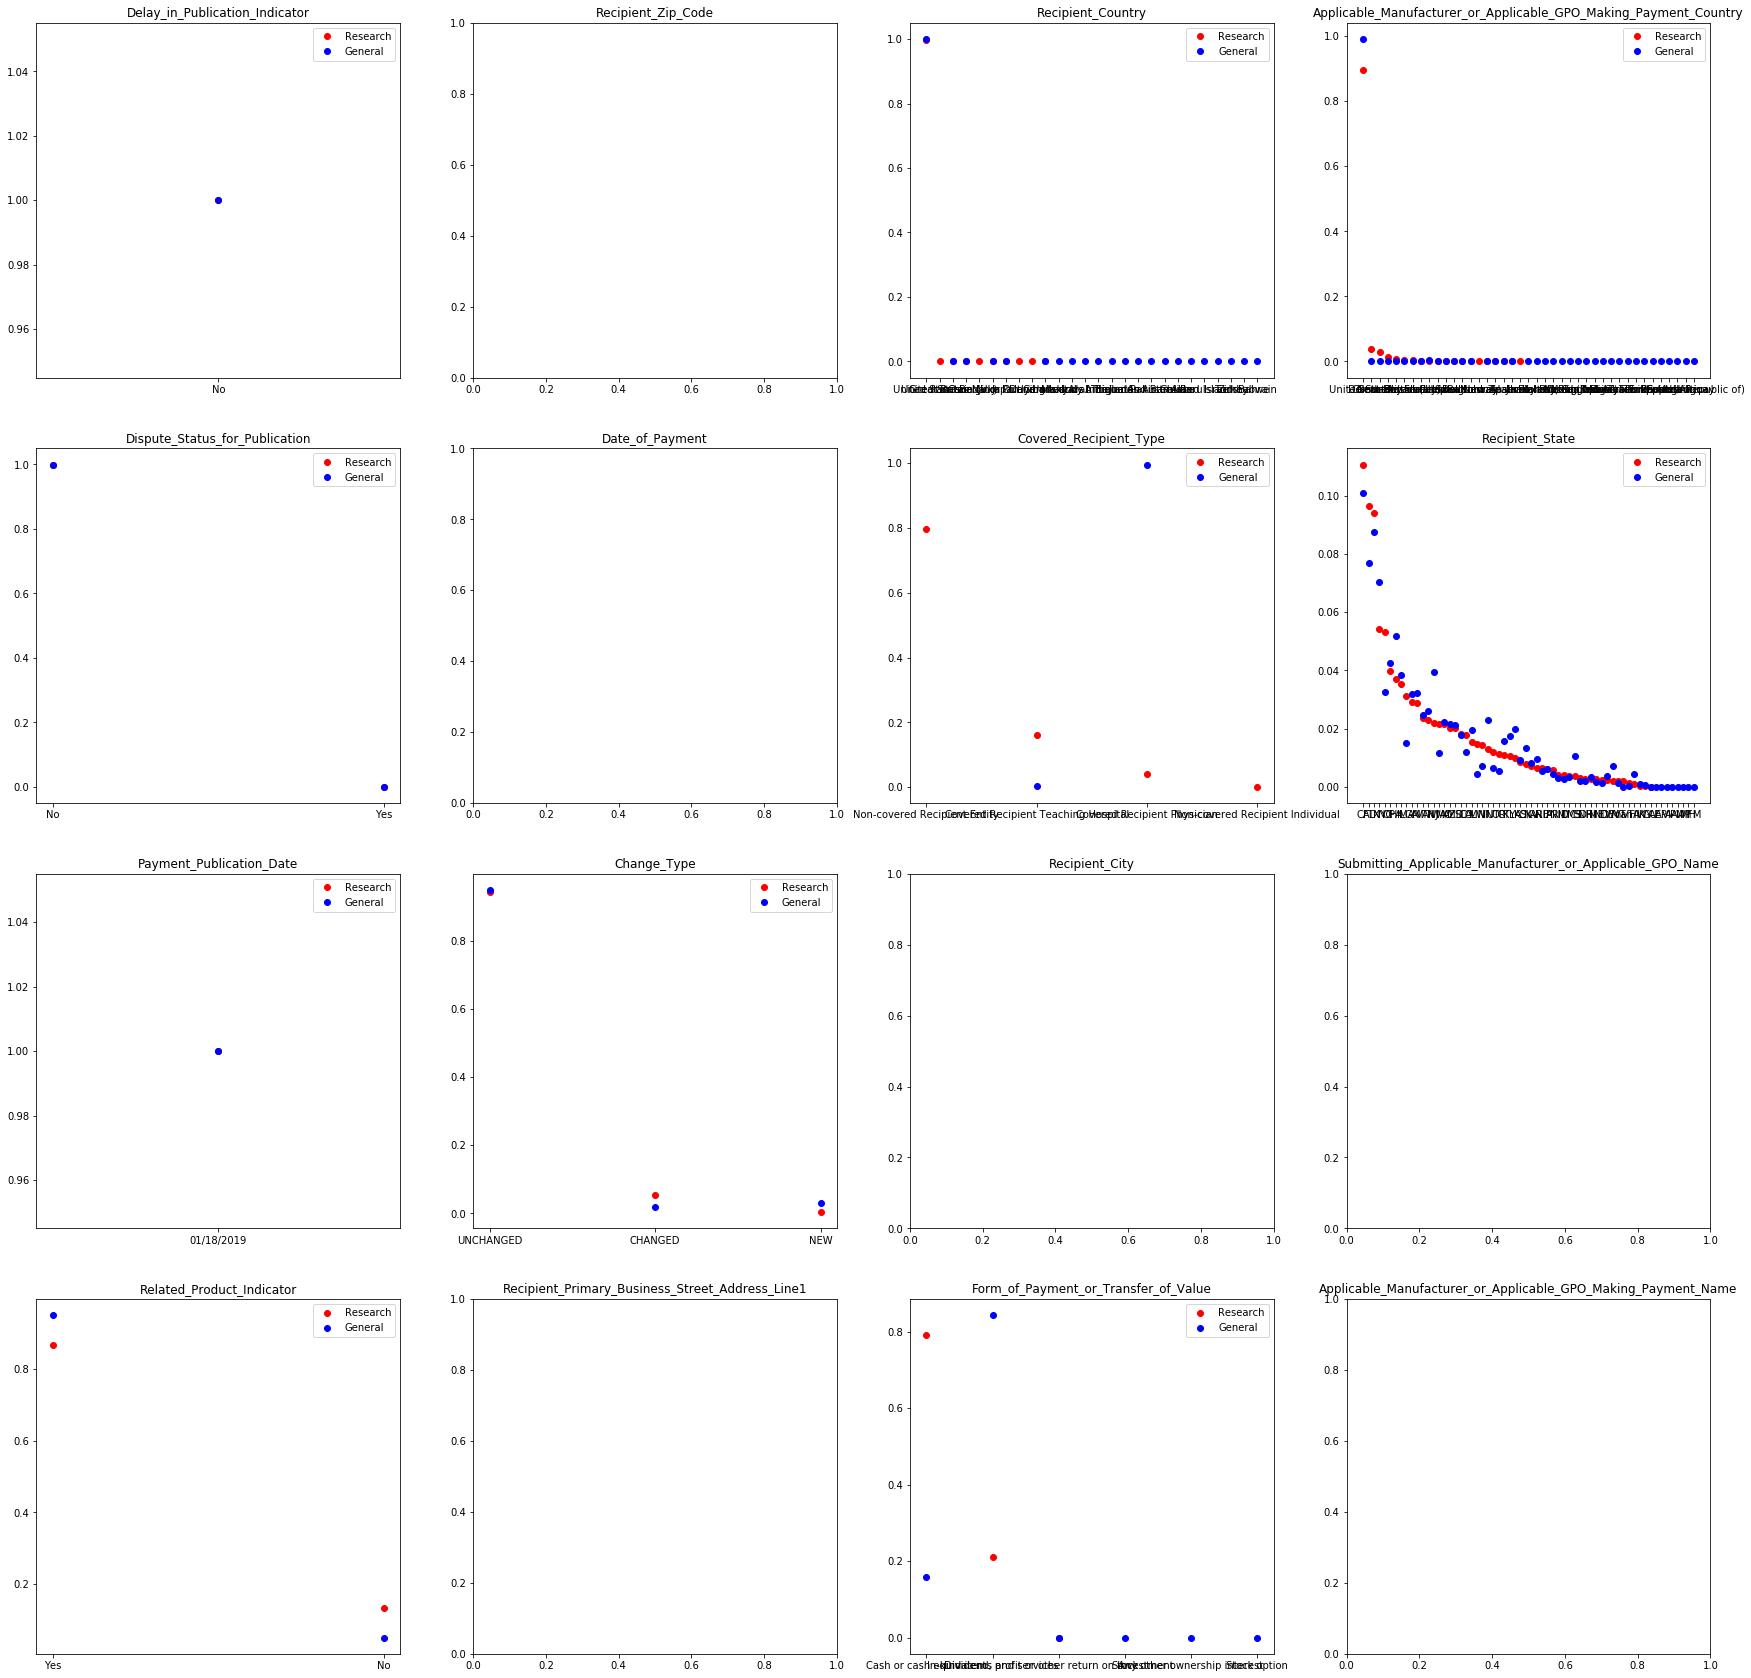

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(30, 30))
head = list(cat_cols)
for i, ax in enumerate(axes.ravel()):
    if i >= len(head):
        break
    j = head[i]
    ax.set_title("{}".format(j))
    if len(general_cleaned_cat.iloc[:, i].value_counts()) > 100:
        continue
    ax.plot(research_cleaned_cat[j].value_counts().keys(),
            research_cleaned_cat[j].value_counts().values/len(research_cleaned_cat),
            'ro', label='Research')
    ax.plot(general_cleaned_cat[j].value_counts().keys(),
            general_cleaned_cat[j].value_counts().values/len(general_cleaned_cat),
            'bo', label='General')

#### Observation:<ul>
<li>The picture above plots the frequency density (frequency/class size) of each categorical feature in two classes. Intuitively, if the red dots and blue dots are far away each other then the feature should be ideal.</li>
<li>
 Plots for columns with more than 300 categories are difficult to comprehend, therefore have been omitted.
    </li>


#### b. Continuous Features Analysis:

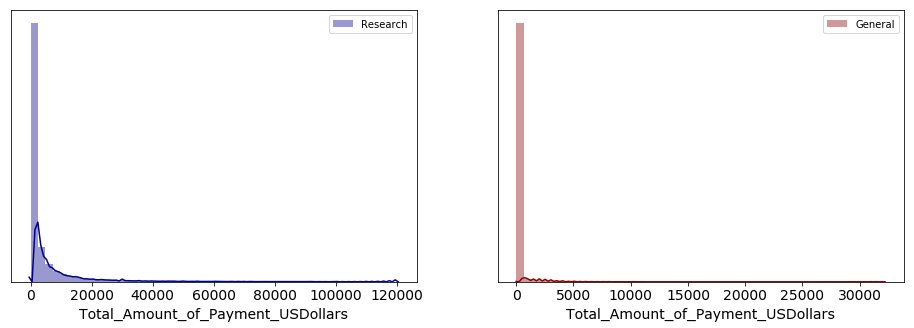

In [91]:
f, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(np.sort(research_cleaned_con['Total_Amount_of_Payment_USDollars'])
             [:-5000], hist=True, rug=False, ax=ax[0], color='darkblue',
             kde_kws={"shade": False}, label='Research')
sns.distplot(np.sort(general_cleaned_con['Total_Amount_of_Payment_USDollars'])
             [:-5000], hist=True, rug=False, ax=ax[1], color='darkred',
             kde_kws={"shade": False}, label='General')
plt.setp(ax,yticks=[])
ax[0].tick_params(axis='both',labelsize=14)
ax[1].tick_params(axis='both',labelsize=14)
ax[0].set_xlabel('Total_Amount_of_Payment_USDollars',size=14,family='Verdana')
ax[1].set_xlabel('Total_Amount_of_Payment_USDollars',size=14,family='Verdana')
ax[0].legend()
ax[1].legend()


In [20]:
general_cleaned_con['Total_Amount_of_Payment_USDollars'].describe()

count    1.066383e+07
mean     2.638836e+02
std      2.213081e+04
min      1.000000e-02
25%      1.154000e+01
50%      1.565000e+01
75%      2.454000e+01
max      2.684237e+07
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [21]:
research_cleaned_con['Total_Amount_of_Payment_USDollars'].describe()

count    6.025300e+05
mean     7.568244e+03
std      1.148221e+05
min      1.000000e-02
25%      1.420000e+02
50%      8.089200e+02
75%      3.266910e+03
max      5.910413e+07
Name: Total_Amount_of_Payment_USDollars, dtype: float64

#### Observation:

 <ul>
 <li>1. The total amount of payments for any research projects is more than the amount spent for general use. </li>
 <li>2. Most research projects pay less than 20000 USD </li>
 
 <li>3. Most payments made for general usage are less than 100 USD</li>
 <li>4. Overall, this feature seems to be very important in differentiating between general and research payments</li>
 </ul>


## Feature Engineering

<ul>
    <b> Removing unimportant features.</b>
<li>'Change_Type','Delay_in_Publication_Indicator', 'Payment_Publication_Date','Dispute_Status_for_Publication': It is clearly visible from the fig that these columns do not adequetly differentiate between the general and research categories.</li>
<li> Remove 'Covered_Recepient_Type': should be removed because of leaking the information of target. </li>
<li>'Date_of_Payment' will be updated after the payment is completed and hence is irrelevant to our analysis.</li>


### Combine research and general data and remove irrelevant features

In [22]:
data = pd.concat([research_cleaned,general_cleaned])

In [23]:
y = data['Target']
cat_cols=list(set(cat_cols)-set(['Change_Type','Delay_in_Publication_Indicator','Payment_Publication_Date','Dispute_Status_for_Publication','Covered_Recipient_Type','Covered_Recipient_Type','Date_of_Payment']))
cat_cols.append('Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID')
con_cols=list(con_cols)
con_cols.remove('Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID')
data.drop(['Change_Type','Delay_in_Publication_Indicator','Payment_Publication_Date','Dispute_Status_for_Publication','Covered_Recipient_Type','Covered_Recipient_Type','Date_of_Payment','Target'],1,inplace=True)
            


## Baseline Model

In [24]:
X = data
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X,y, stratify=y,test_size=0.9,shuffle=True,random_state=42)

#### Ordinal encoding

In [25]:
for i in cat_cols:
    X_train_sub[i]=X_train_sub[i].astype("category").cat.codes

In [26]:
X_train_sub.head()

,Total_Amount_of_Payment_USDollars,Program_Year,Recipient_Zip_Code,Recipient_Country,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Recipient_State,Recipient_City,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Related_Product_Indicator,Recipient_Primary_Business_Street_Address_Line1,Form_of_Payment_or_Transfer_of_Value,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name
Record_ID,,,,,,,,,,,,,
504173975,13.58,2017,81700,8,31,21,9174,729,1,179478,3,101,836
504341291,125.00,2017,23368,8,31,39,1008,644,1,161708,3,0,740
499751214,18.00,2017,114643,8,31,42,9749,16,1,4696,3,705,18
488378419,19.41,2017,56253,8,31,3,788,421,1,3243,3,99,491
455672051,12.53,2017,79618,8,31,29,1827,152,1,94719,3,356,165


#### Train-test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_train_sub,y_train_sub, stratify=y_train_sub,test_size=0.9,shuffle=True,random_state=42)

### Model with ordinal encoding + Logistic Regression 

In [28]:
scores = cross_validate(LogisticRegression(),
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))

-------test_roc_auc------
0.7825639705776126
-------test_accuracy------
0.9501522261696976
-------test_average_precision------
0.3617017939890038
-------test_f1------
0.16334540023415084
-------recall------
0.09211638375123277


#### Observation:

As the result shows, the prediction accuracy is very high in baseline model however the f1 score and recall are very low which are because of the imbalance of dataset. To tackle this problem, we have to undersampling data.

### Undersampling

In [29]:
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), LogisticRegression())
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))
print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))

-------test_roc_auc------
0.9288082309336154
-------test_accuracy------
0.8450688424399694
-------test_average_precision------
0.4740894962988384
-------test_f1------
0.3692592229821373
-------recall------
0.8479702814829506


#### Observation:

After undersampling the data, the recall,f1 score, precision increased significantly in baseline model 

### Other Encoding Schemes

<p>As seen during the analysis of categorical data, some features, such as <br/>
'Recipient_State',<br/>
'Date_of_Payment',<br/>
'Recipient_Zip_Code',<br/>
'Recipient_City',<br/>
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',<br/>
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name' <br/>
    have more than 100 categories which needs <b>target encoding</b>. 

For features such as 'Recipient_Country'  have only 4 classes and can be <b>one-hot encoded</b>.
<p>



In [30]:
X_train.columns

Index(['Total_Amount_of_Payment_USDollars', 'Program_Year',
       'Recipient_Zip_Code', 'Recipient_Country',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Recipient_State', 'Recipient_City',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Related_Product_Indicator',
       'Recipient_Primary_Business_Street_Address_Line1',
       'Form_of_Payment_or_Transfer_of_Value',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'],
      dtype='object')

In [31]:
target_e={'Recipient_State','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
          'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'}
continuous={'Total_Amount_of_Payment_USDollars'}
one_hot=set(X_train)-target_e-continuous

target_id=set()
one_hot_id=set()
continuous_id=set()
for index, value in enumerate(list(X_train)):
    if value in target_e:
        target_id.add(index)
    elif value in one_hot:
        one_hot_id.add(index)
    else:
        continuous_id.add(index)

In [32]:
### Build a pipeline:

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())])

categorical_transformer_target=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('target', TargetEncoder(handle_unknown='impute'))])

categorical_transformer_one_hot=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])


continuous=np.array(list(continuous_id))

categorical_target=np.array(list(target_id))

categorical_one_hot=np.array(list(one_hot_id))


preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,continuous),
        ('cat_target', categorical_transformer_target, categorical_target),
        ('cat_onehot', categorical_transformer_one_hot, categorical_one_hot)
    ])

clf_L=make_imb_pipeline(RandomUnderSampler(),preprocessor,LogisticRegression())

scores = cross_validate(clf_L,
                        X_train, y_train, cv=3,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.9068727156505574
-------test_accuracy------
0.8382610025601359
-------test_average_precision------
0.36591897657947614
-------test_f1------
0.35774455371383757
-------recall------
0.8423249923815606


#### Observation:
Target encoding works slightly better than ordinal encoding

### PREDICTIVE MODEL

#### RANDOM FOREST MODEL

In [34]:
clf_RF=make_imb_pipeline(RandomUnderSampler(),preprocessor,RandomForestClassifier(n_estimators=10))

scores = cross_validate(clf_RF,
                        X_train, y_train, cv=3,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.9765707273308726
-------test_accuracy------
0.9295864565242179
-------test_average_precision------
0.6421008032671963
-------test_f1------
0.5891639577894635
-------recall------
0.944065698381189


#### PARAMETER TUNING

Best Parameter: {'randomforestclassifier__n_estimators': 30}


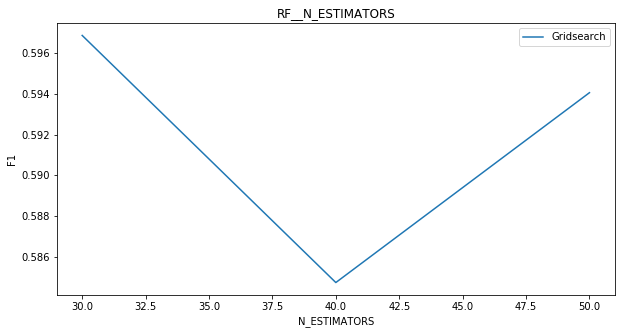

In [96]:
## Tune Parameters of n esitmators 
parameters = {}
param_grid = {'randomforestclassifier__n_estimators':np.array(range(30,60,10))}
CV_RF = GridSearchCV(clf_RF, param_grid, scoring = 'f1')
CV_RF.fit(X_train, y_train)
print('Best Parameter:', CV_RF.best_params_)
L=len(CV_RF.cv_results_['param_randomforestclassifier__n_estimators'])
plt.figure(figsize=(10,5))
plt.plot(CV_RF.cv_results_['param_randomforestclassifier__n_estimators'].data, CV_RF.cv_results_ ['mean_test_score'],label="Gridsearch")
#plt.plot(CV_R.cv_results_["param_Ridge__alpha"].data,[0.863]*L,"red",label="base")
plt.title("RF__N_ESTIMATORS")
plt.xlabel("N_ESTIMATORS")
plt.ylabel("F1")
plt.legend()


### FEATURE SELECTION

#### MUTUAL INFORMATION AND F-VALUES

In [37]:
score_mi=mutual_info_classif(X_train, y_train, discrete_features='auto', n_neighbors=1, copy=True, random_state=None)


#### PRINT features in order of prioirty from high to low

In [39]:
[list(X_train)[i] for i in list(np.argsort(score_mi)[::-1])]

['Total_Amount_of_Payment_USDollars',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Recipient_Primary_Business_Street_Address_Line1',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Recipient_Zip_Code',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Recipient_City',
 'Form_of_Payment_or_Transfer_of_Value',
 'Related_Product_Indicator',
 'Recipient_State',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
 'Recipient_Country',
 'Program_Year']

#### CALCULATE F-VALUES

In [40]:
f_values, p_values = f_classif(X_train, y_train)

#### PLOT F-VALUES AND MI

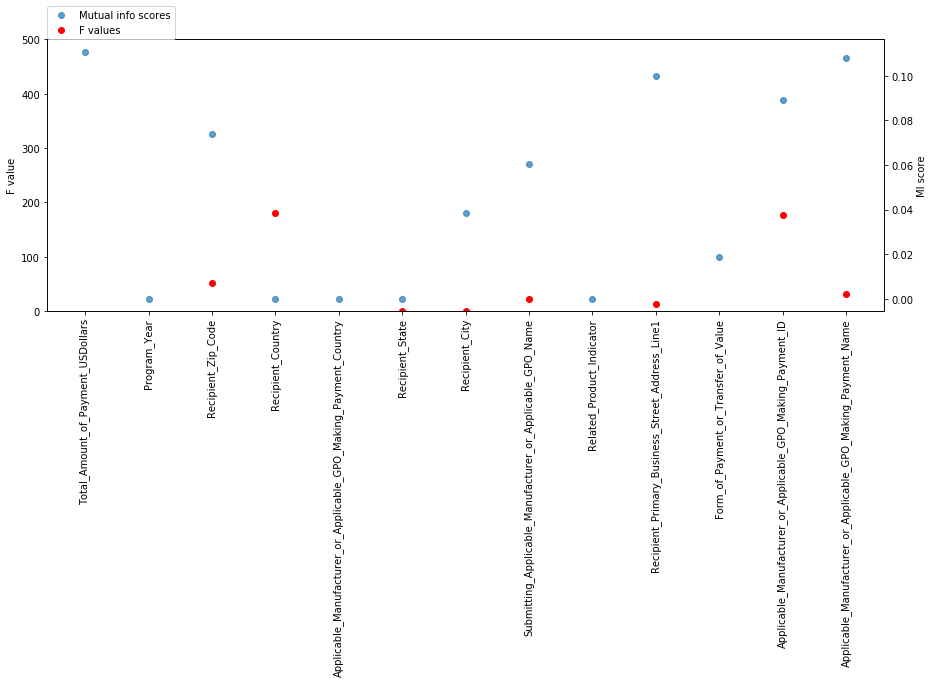

In [41]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(15,5)
line_f, = ax1.plot(f_values, 'o', c='r')
# plt.ylabel("F value")
ax2 = plt.twinx()
line_s, = ax2.plot(score_mi, 'o', alpha=.7)
ax2.set_ylabel("MI score")
ax1.set_xticks(range(len(list(X_train))))
ax1.set_xticklabels(list(X_train),rotation='vertical');
ax1.set_ylabel('F value')
ax1.set_ylim(0,500)
plt.legend([line_s, line_f], ["Mutual info scores", "F values"], loc=(0, 1))

#### Observation:
We can compare features from their mutual information and f-value graph as well. 
We know that a higher f-value and higher mutual information value gives a good feature. 

We can see 'Total_Amount_of_Payment_USDollars','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Related_Product_Indicator','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country' are all good features.
[The f-value cant be seen on the graph due to ylimit, but it mean the f-value is very high] 


Whereas Recipient_state, Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name, Recipient_zip_code
have low f-values, indicating bad features.



### RUN THE MODEL WITH BEST FEATURES

In [47]:
X_train.drop(['Recipient_State', 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Recipient_Zip_Code'],axis=1)

In [46]:
clf_RF=make_imb_pipeline(RandomUnderSampler(),preprocessor,RandomForestClassifier(n_estimators=10))

scores = cross_validate(clf_RF,
                        X_train, y_train, cv=3,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.9777574625726498
-------test_accuracy------
0.9307137238050517
-------test_average_precision------
0.652730225198507
-------test_f1------
0.5946756289049556
-------recall------
0.9503726424978698


#### Observation:

From the results after feature selection, it can be observed that the scores are almost the same, in fact there is a marginal improvement. This reinforces the fact that the features that were removed did not add any new information to the model. 